\

# M1 Assignement 1

# 1 Understand Business Context

Brainstorm with your group to define what you want to explore. Do you have a research question or a theory? Identify the 'business problem' you're addressing.


##  BUSINESS PROBLEM: "Which countries have the greatest need for microloans, and how can we optimize loan allocation based on the different sectors"


In [154]:
#implement dataset and libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import geopandas as gpd
import altair as alt
from vega_datasets import data

In [155]:
# Download data from Github (we will use the loan-datasets for now)

!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip"
!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip"
!wget -nc "https://github.com/aaubs/ds-master/raw/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip"

# Unzip to csv
!unzip -o kiva_loans_part_0.csv.zip
!unzip -o kiva_loans_part_1.csv.zip
!unzip -o kiva_loans_part_2.csv.zip

# Loading datasets
data_part1 = pd.read_csv("kiva_loans_part_0.csv")
data_part2 = pd.read_csv("kiva_loans_part_1.csv")
data_part3 = pd.read_csv("kiva_loans_part_2.csv")

File ‘kiva_loans_part_0.csv.zip’ already there; not retrieving.

File ‘kiva_loans_part_1.csv.zip’ already there; not retrieving.

File ‘kiva_loans_part_2.csv.zip’ already there; not retrieving.

Archive:  kiva_loans_part_0.csv.zip
  inflating: kiva_loans_part_0.csv   
  inflating: __MACOSX/._kiva_loans_part_0.csv  
Archive:  kiva_loans_part_1.csv.zip
  inflating: kiva_loans_part_1.csv   
  inflating: __MACOSX/._kiva_loans_part_1.csv  
Archive:  kiva_loans_part_2.csv.zip
  inflating: kiva_loans_part_2.csv   
  inflating: __MACOSX/._kiva_loans_part_2.csv  



# 2 Data Cleaning and Manipulation

Assess the dataset for quality issues and fix missing values, outliers, and data type inconsistencies. Perform necessary transformations, create new variables, and normalize data if appropriate. If needed, merge data from multiple sources using appropriate joins. Summarize data using groupby to calculate relevant statistics (e.g., sums, averages).


In [156]:
# We can see, that the imported loan dataset consists of 3 parts. We will like to combine these to one big dataset
data = pd.concat([data_part1, data_part2, data_part3])

In [157]:
# Show the first rows
data.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [158]:
# Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-null  in

We can see, that there likely are missing values.. Using isna() to check

In [159]:
#Check to find columns with missing data
data.isna().sum()

,0
id,0
funded_amount,0
loan_amount,0
activity,0
sector,0
use,4232
country_code,8
country,0
region,56800
currency,0


We can see, that alot of data is missing from the tags column. That column is not relevant along with column 'use', since that column consists of alot of qualitative data. As well as 'currency' and 'country_code' And it will be dropped.

In [160]:
data = data.drop(['tags', 'use', 'currency', 'country_code','activity','id','partner_id'], axis=1)

In [161]:
#Storing length of rows for comparing, >> before dropna.. <<
data_rows = len(data)

#Dropping missing values
data.dropna(inplace=True)

#Storing the now cleaned dataset
cleaned_rows = len(data)

#Check..
drops = data_rows - cleaned_rows

print(f"Number of dropped rows: {drops}")
print(f'In percentage {(drops / data_rows) * 100:.2f} % of the rows was removed')

Number of dropped rows: 97078
In percentage 14.46 % of the rows was removed


In [162]:
# New data info after cleaning (dropna)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574127 entries, 0 to 221186
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       574127 non-null  float64
 1   loan_amount         574127 non-null  float64
 2   sector              574127 non-null  object 
 3   country             574127 non-null  object 
 4   region              574127 non-null  object 
 5   posted_time         574127 non-null  object 
 6   disbursed_time      574127 non-null  object 
 7   funded_time         574127 non-null  object 
 8   term_in_months      574127 non-null  float64
 9   lender_count        574127 non-null  int64  
 10  borrower_genders    574127 non-null  object 
 11  repayment_interval  574127 non-null  object 
 12  date                574127 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 61.3+ MB


In [163]:
data.groupby(['country'])[['loan_amount', 'funded_amount']].agg(['mean', 'sum', 'max'])

loan_amount                      funded_amount              \
                    mean         sum      max          mean         sum   
country                                                                   
Afghanistan  7000.000000     14000.0   8000.0   7000.000000     14000.0   
Albania      1333.026874   1884900.0  50000.0   1333.026874   1884900.0   
Armenia      1430.298354   9731750.0   4250.0   1430.298354   9731750.0   
Azerbaijan   1482.426569   2220675.0  16675.0   1482.426569   2220675.0   
Belize        910.365854    111975.0   2975.0    910.365854    111975.0   
...                  ...         ...      ...           ...         ...   
Vanuatu      2312.500000      9250.0   3350.0   2312.500000      9250.0   
Vietnam      1269.965577  12543450.0   6175.0   1269.965577  12543450.0   
Yemen         765.796831   1643400.0  13975.0    765.796831   1643400.0   
Zambia       1518.451520   1049250.0  50000.0   1518.451520   1049250.0   
Zimbabwe      845.253003   3307475.0  50000.0    845.253003   3307475.0   

                      
                 max  
country               
Afghanistan   8000.0  
Albania      50000.0  
Armenia       4250.0  
Azerbaijan   16675.0  
Belize        2975.0  
...              ...  
Vanuatu       3350.0  
Vietnam       6175.0  
Yemen        13975.0  
Zambia       50000.0  
Zimbabwe     50000.0  

[82 rows x 6 columns]

In [164]:
data.groupby(['sector'])[['loan_amount', 'funded_amount']].agg(['mean', 'sum', 'max'])

loan_amount                        funded_amount               \
                       mean          sum       max          mean          sum   
sector                                                                          
Agriculture      734.884336  115381250.0  100000.0    734.884336  115381250.0   
Arts             955.031253   10084175.0   40000.0    955.031253   10084175.0   
Clothing        1087.093477   28445975.0   50000.0   1087.093477   28445975.0   
Construction     971.470642    5278000.0   25000.0    971.470642    5278000.0   
Education        956.917514   27192725.0   50000.0    956.917514   27192725.0   
Entertainment    959.527687     589150.0    6600.0    959.527687     589150.0   
Food             778.069053   91178800.0   30000.0    778.069053   91178800.0   
Health          1018.320388    7866525.0   50000.0   1018.320388    7866525.0   
Housing          658.360310   16676925.0   10000.0    658.360310   16676925.0   
Manufacturing    838.588184    4826075.0   50000.0    838.588184    4826075.0   
Personal Use     380.380920   13026525.0   13425.0    380.380920   13026525.0   
Retail           694.954361   73319075.0   50000.0    694.954361   73319075.0   
Services         892.098002   32333200.0   50000.0    892.098002   32333200.0   
Transportation   627.719101    8380050.0   35000.0    627.719101    8380050.0   
Wholesale       1409.839527     834625.0   50000.0   1409.839527     834625.0   

                          
                     max  
sector                    
Agriculture     100000.0  
Arts             40000.0  
Clothing         50000.0  
Construction     25000.0  
Education        50000.0  
Entertainment     6600.0  
Food             30000.0  
Health           50000.0  
Housing          10000.0  
Manufacturing    50000.0  
Personal Use     13425.0  
Retail           50000.0  
Services         50000.0  
Transportation   35000.0  
Wholesale        50000.0

In [165]:
data[['loan_amount', 'funded_amount', 'term_in_months']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,574127.0,758.391567,1051.554879,25.0,250.0,450.0,900.0,100000.0
funded_amount,574127.0,758.391567,1051.554879,25.0,250.0,450.0,900.0,100000.0
term_in_months,574127.0,13.438011,8.581805,2.0,8.0,12.0,14.0,158.0


### kurtosis and skew




In [166]:
print(data['loan_amount'].kurtosis())
print(data['loan_amount'].skew())

495.36473761372037
12.149114651229462


### Removing outliers of the sample as a whole



Text(0.5, 1.0, 'Box Plot of Passenger loan_amount')

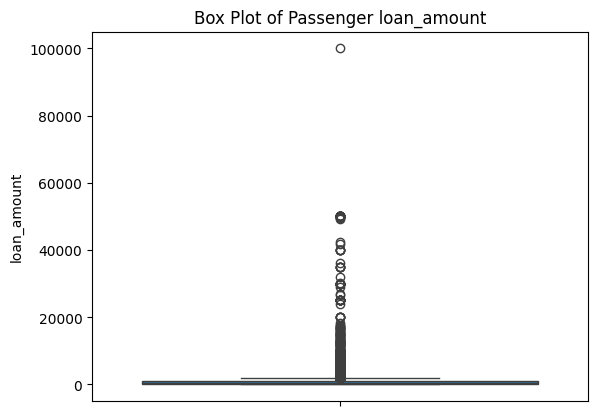

In [167]:
sns.boxplot(data=data, y='loan_amount').set_title('Box Plot of Passenger loan_amount')

In [168]:
# Calculate Z-scores
z_scores = zscore(data['loan_amount'])

# Get boolean array indicating the presence of outliers
# Using 2 & -2 z_scores to get 95% of data within 2 standard deviations
data['outlier_loan_amount'] = (z_scores > 2) | (z_scores < -2)


#Removing outliers
data_clean = data[~data['outlier_loan_amount']]

# Check amount of outliers (if any?)
data['outlier_loan_amount'].sum()

23129

In [169]:
print(data_clean['loan_amount'].kurtosis())
print(data_clean['loan_amount'].skew())

3.26098901564175
1.75684104358664


Text(0.5, 1.0, 'Box Plot of Passenger loan_amount')

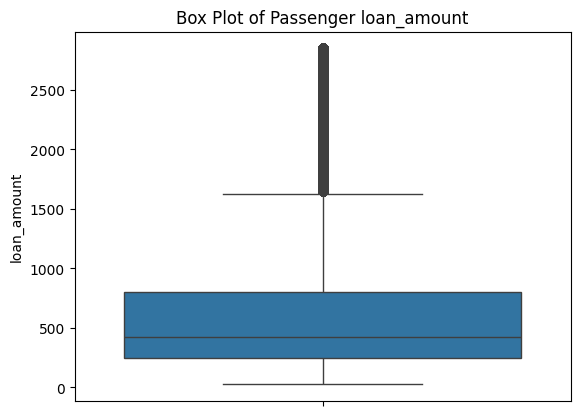

In [170]:
# Boxplot check after removal of outliers
sns.boxplot(data=data_clean, y='loan_amount').set_title('Box Plot of Passenger loan_amount')

3 Descriptive Statistics

Calculate basic statistics for key variables (mean, median, variance, etc.). Explore data distributions with histograms, box plots, and density plots.

In [171]:
# Description of cleaned data
data_clean[['loan_amount', 'funded_amount', 'term_in_months']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amount,550998.0,601.934490,507.332615,25.0,250.0,425.0,800.0,2850.0
funded_amount,550998.0,601.934490,507.332615,25.0,250.0,425.0,800.0,2850.0
term_in_months,550998.0,13.407176,8.139459,2.0,8.0,13.0,14.0,141.0


<ipython-input-172-40350be6c9b1>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_clean['loan_amount'], label='loan_amount', shade=True).set_title('loan_amount')


Text(0.5, 1.0, 'loan_amount')

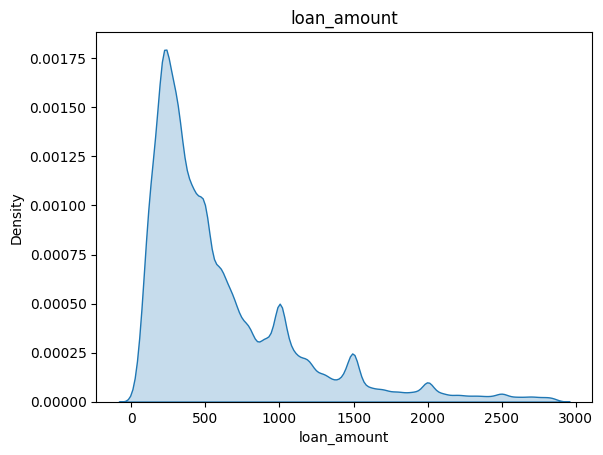

In [172]:
sns.kdeplot(data_clean['loan_amount'], label='loan_amount', shade=True).set_title('loan_amount')

In [173]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Count occurrences of each country in data_clean
country_counts = data_clean['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']  # Rename columns for clarity

merged = world.merge(country_counts, left_on='name', right_on='country', how='left')
merged['count'] = merged['count'].fillna(0)
# Create the map with color scaling based on 'count'
simple_map = alt.Chart(merged).mark_geoshape().encode(
    color=alt.Color('count:Q', title='Occurrences', scale=alt.Scale(range=['#f0f0f0', 'blue'])),  # Color scale based on count
    tooltip=['country', 'count']  # Tooltip showing country name and count
).properties(
    title='Country Occurrences',
    width=1200,
    height=600
).project('mercator')

simple_map

<ipython-input-173-995139064d61>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

### Top 10 countries, funded amount

In [174]:
# What is the total amount of loan_amount for each country?
country_loans = data_clean.groupby('country')['loan_amount'].sum()

# We would like a classic top 10 to get an overview of the
country_top_10 = country_loans.sort_values(ascending=False).head(10)

print(country_top_10)

country
Philippines    53296250.0
Kenya          26560750.0
Cambodia       17734975.0
Peru           16879250.0
Ecuador        12079400.0
Tajikistan     11988550.0
Uganda         11594500.0
Pakistan       11581200.0
El Salvador    10657050.0
Vietnam         9887975.0
Name: loan_amount, dtype: float64


In [175]:
country_top_10.sum()/country_loans.sum()

0.5495305952065445

In [176]:
data_top_10 = data_clean[data_clean['country'].isin(country_top_10.index)]

data_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369060 entries, 0 to 221170
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   funded_amount        369060 non-null  float64
 1   loan_amount          369060 non-null  float64
 2   sector               369060 non-null  object 
 3   country              369060 non-null  object 
 4   region               369060 non-null  object 
 5   posted_time          369060 non-null  object 
 6   disbursed_time       369060 non-null  object 
 7   funded_time          369060 non-null  object 
 8   term_in_months       369060 non-null  float64
 9   lender_count         369060 non-null  int64  
 10  borrower_genders     369060 non-null  object 
 11  repayment_interval   369060 non-null  object 
 12  date                 369060 non-null  object 
 13  outlier_loan_amount  369060 non-null  bool   
dtypes: bool(1), float64(3), int64(1), object(9)
memory usage: 39.8+ MB


<ipython-input-177-f554733f6df4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_top_10.index, y=country_top_10.values, palette="viridis")


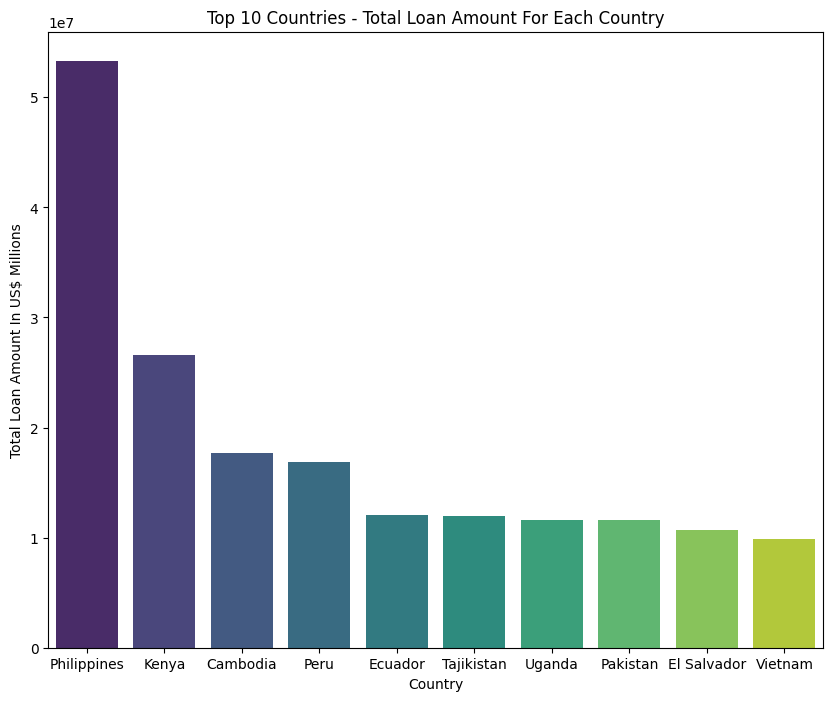

In [177]:
plt.figure(figsize=(10, 8))
sns.barplot(x=country_top_10.index, y=country_top_10.values, palette="viridis")
plt.title('Top 10 Countries - Total Loan Amount For Each Country')
plt.xlabel('Country')
plt.ylabel('Total Loan Amount In US$ Millions')  # managed to add labels (J)
plt.show()

We would like to get the percentage of total loan amount among the top 10 countries

In [178]:
# We need to sum all numbers first
total_sum = country_top_10.sum()

# Then we can calculate the percentage
country_top_10_pct = (country_top_10 / total_sum) * 100 # Calculate percentages

# We create pandas df for presentation
result_df = pd.DataFrame({'Country': country_top_10_pct.index, 'percentage': country_top_10_pct.values})

# Results:

result_df

,Country,percentage
0,Philippines,29.241896
1,Kenya,14.573008
2,Cambodia,9.730596
3,Peru,9.261088
4,Ecuador,6.627569
5,Tajikistan,6.577722
6,Uganda,6.361520
7,Pakistan,6.354223
8,El Salvador,5.847172
9,Vietnam,5.425206


## Correlation matrix

To check linear relationship regarding pairs of variables

In [179]:
correlation_data = data_top_10[['funded_amount', 'loan_amount', 'lender_count', 'term_in_months']]

correlation_matrix = correlation_data.corr(method='spearman')

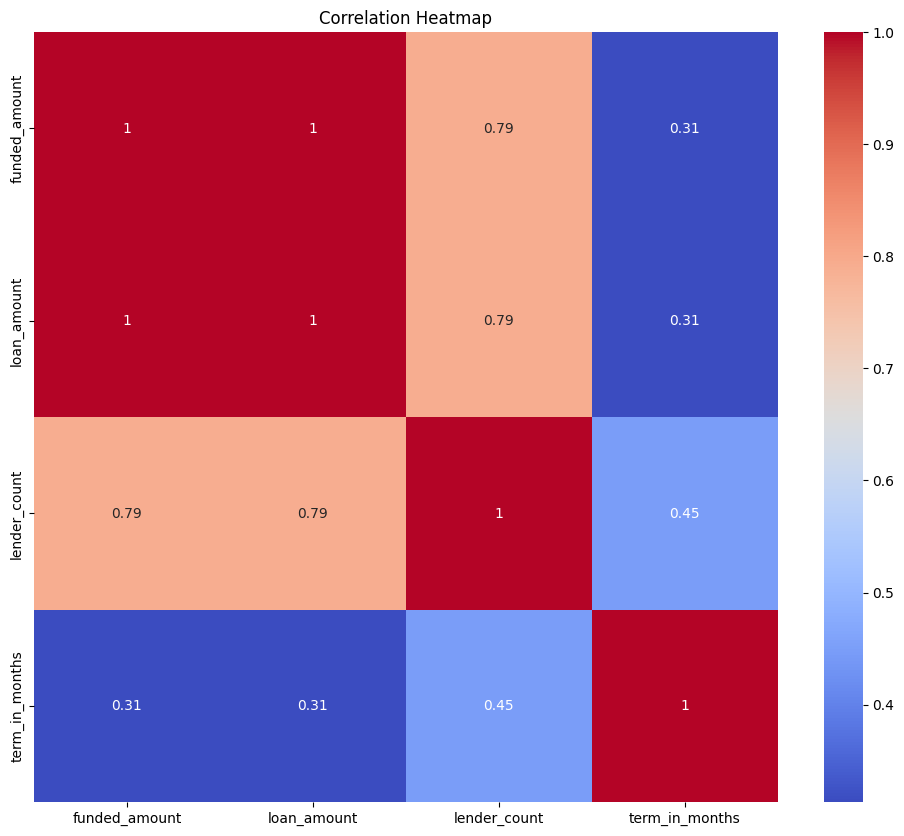

In [180]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 4 Exploratory Data Analysis (EDA) and Visualization

Conduct thorough EDA of your chosen dataset. Create insightful visualizations—avoid trivial visuals like pie charts. Focus on revealing key insights

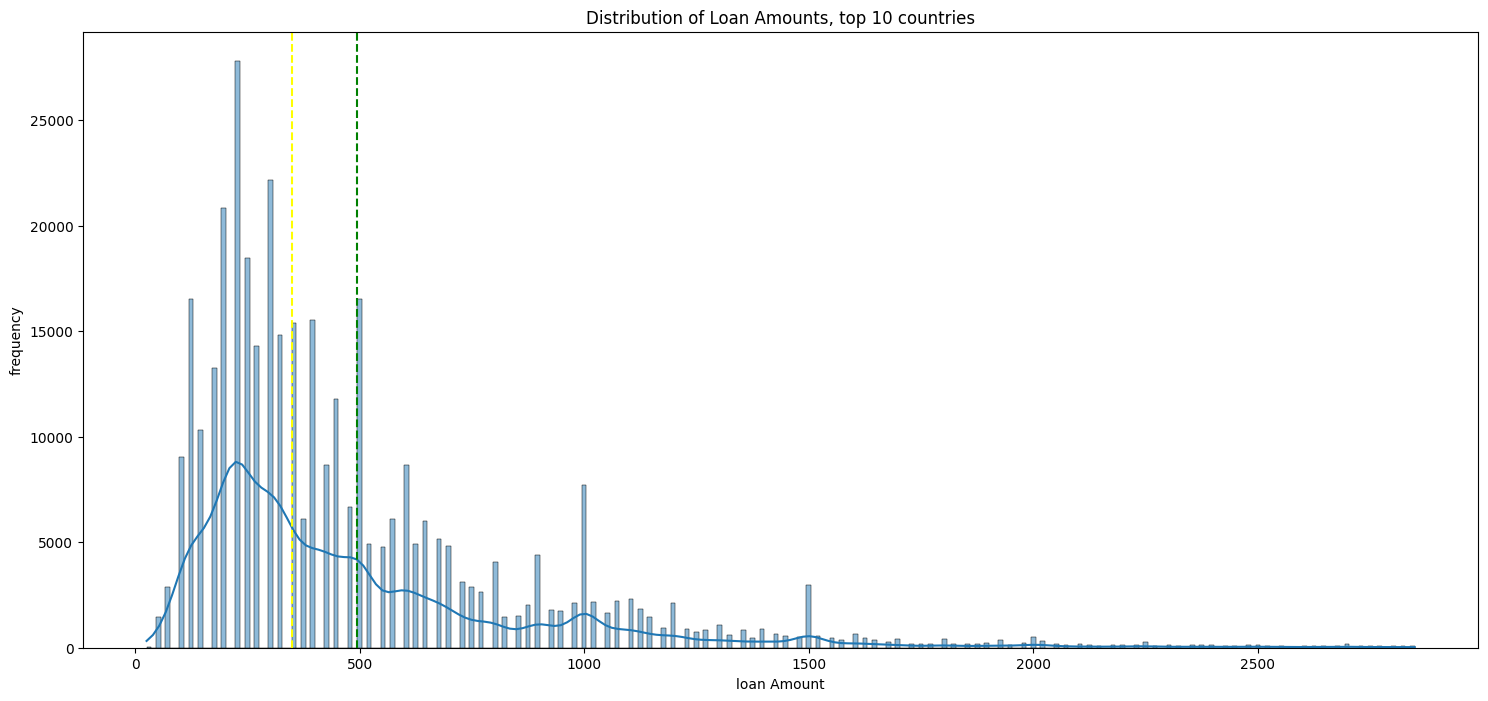

YELLOW LINE: Average loan amount: $493.85
 GREEN LINE: Median loan amount: $350.00


In [181]:
# Define of median and mean
mean_loan = data_top_10['loan_amount'].median()
median_loan = data_top_10['loan_amount'].mean()

# Distribution plot
plt.figure(figsize=(18, 8))
sns.histplot(data_top_10, x='loan_amount', kde=True)
plt.title('Distribution of Loan Amounts, top 10 countries')
plt.axvline(mean_loan, color='yellow', linestyle='--')
plt.axvline(median_loan, color='green', linestyle='--')
plt.xlabel('loan Amount')
plt.ylabel('frequency')
plt.show()

print(f"YELLOW LINE: Average loan amount: ${data_top_10['loan_amount'].mean():.2f}")
print(f" GREEN LINE: Median loan amount: ${data_top_10['loan_amount'].median():.2f}")

#:.2f} tells python to use 2 decimals

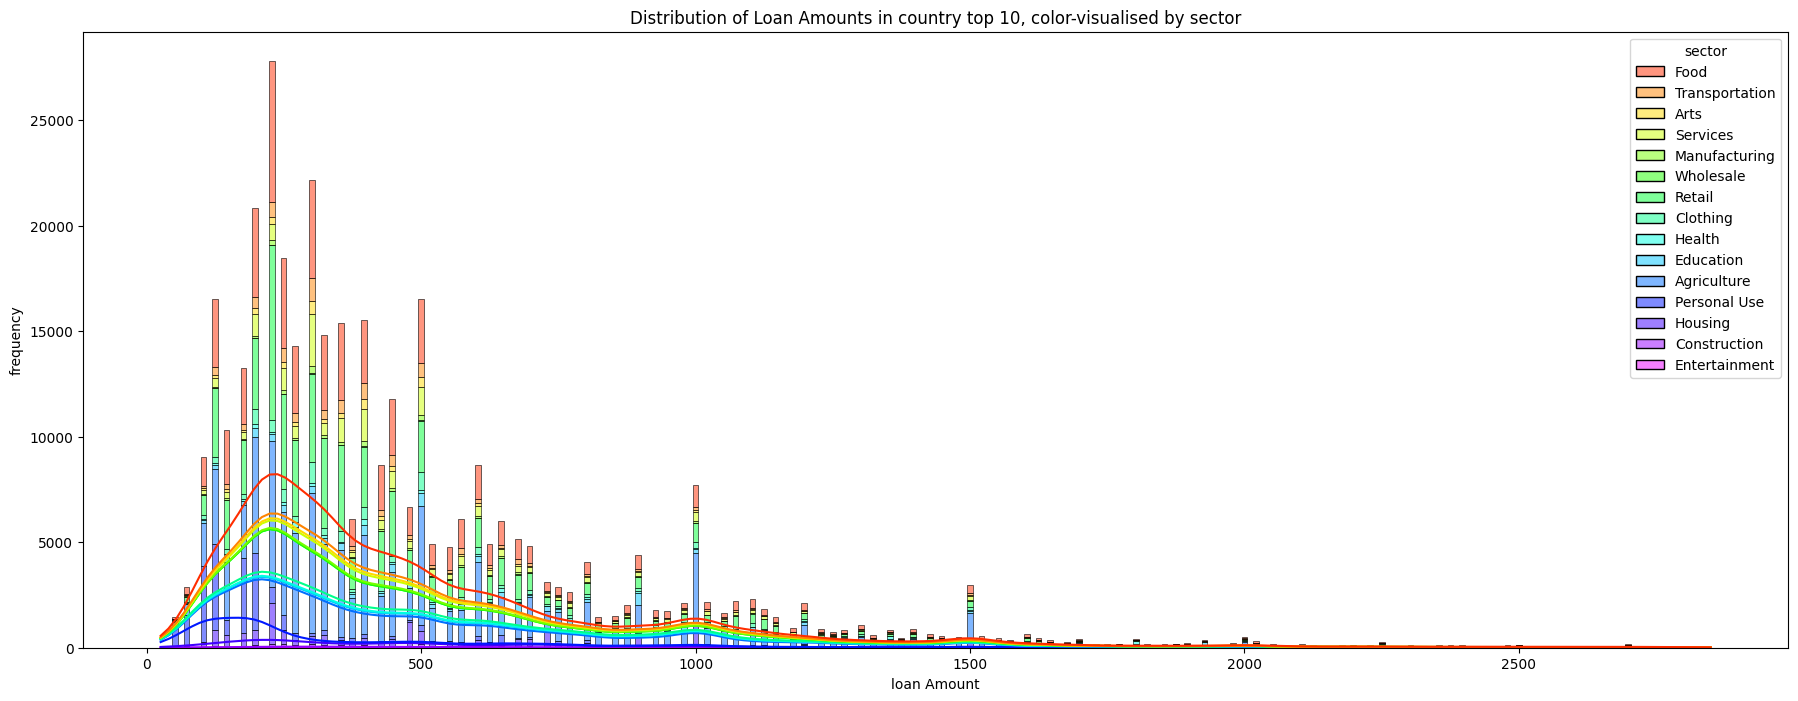

In [182]:
# It's interesting to check the different sectors in top 10

plt.figure(figsize=(22, 8))
sns.histplot(data_top_10, x='loan_amount', hue='sector', multiple='stack', kde=True, palette='gist_rainbow')
plt.title('Distribution of Loan Amounts in country top 10, color-visualised by sector')
plt.xlabel('loan Amount')
plt.ylabel('frequency')
plt.show()

In [183]:
sector_stat = data_top_10.groupby('sector')['loan_amount'].agg(['mean', 'median'])
print(sector_stat)

                      mean  median
sector                            
Agriculture     550.941949   400.0
Arts            491.769512   400.0
Clothing        569.470656   450.0
Construction    584.873157   475.0
Education       756.106568   600.0
Entertainment   563.050847   475.0
Food            464.349183   350.0
Health          660.701374   500.0
Housing         519.570699   450.0
Manufacturing   550.309556   425.0
Personal Use    247.471575   175.0
Retail          442.021720   325.0
Services        515.795556   400.0
Transportation  463.204802   375.0
Wholesale       732.899023   575.0


In [184]:
sector_stat = data_top_10.groupby('sector')['loan_amount'].describe().T
print(sector_stat)

sector    Agriculture         Arts      Clothing  Construction     Education  \
count   108870.000000  5753.000000  12081.000000   2917.000000  11983.000000   
mean       550.941949   491.769512    569.470656    584.873157    756.106568   
std        423.383278   390.470809    423.350240    413.019803    546.455440   
min         25.000000    50.000000     25.000000     50.000000     25.000000   
25%        250.000000   275.000000    275.000000    275.000000    350.000000   
50%        400.000000   400.000000    450.000000    475.000000    600.000000   
75%        700.000000   550.000000    750.000000    775.000000    975.000000   
max       2850.000000  2850.000000   2850.000000   2775.000000   2850.000000   

sector  Entertainment          Food       Health       Housing  Manufacturing  \
count      295.000000  73884.000000  4149.000000  15269.000000    3715.000000   
mean       563.050847    464.349183   660.701374    519.570699     550.309556   
std        366.124000    383.899798 

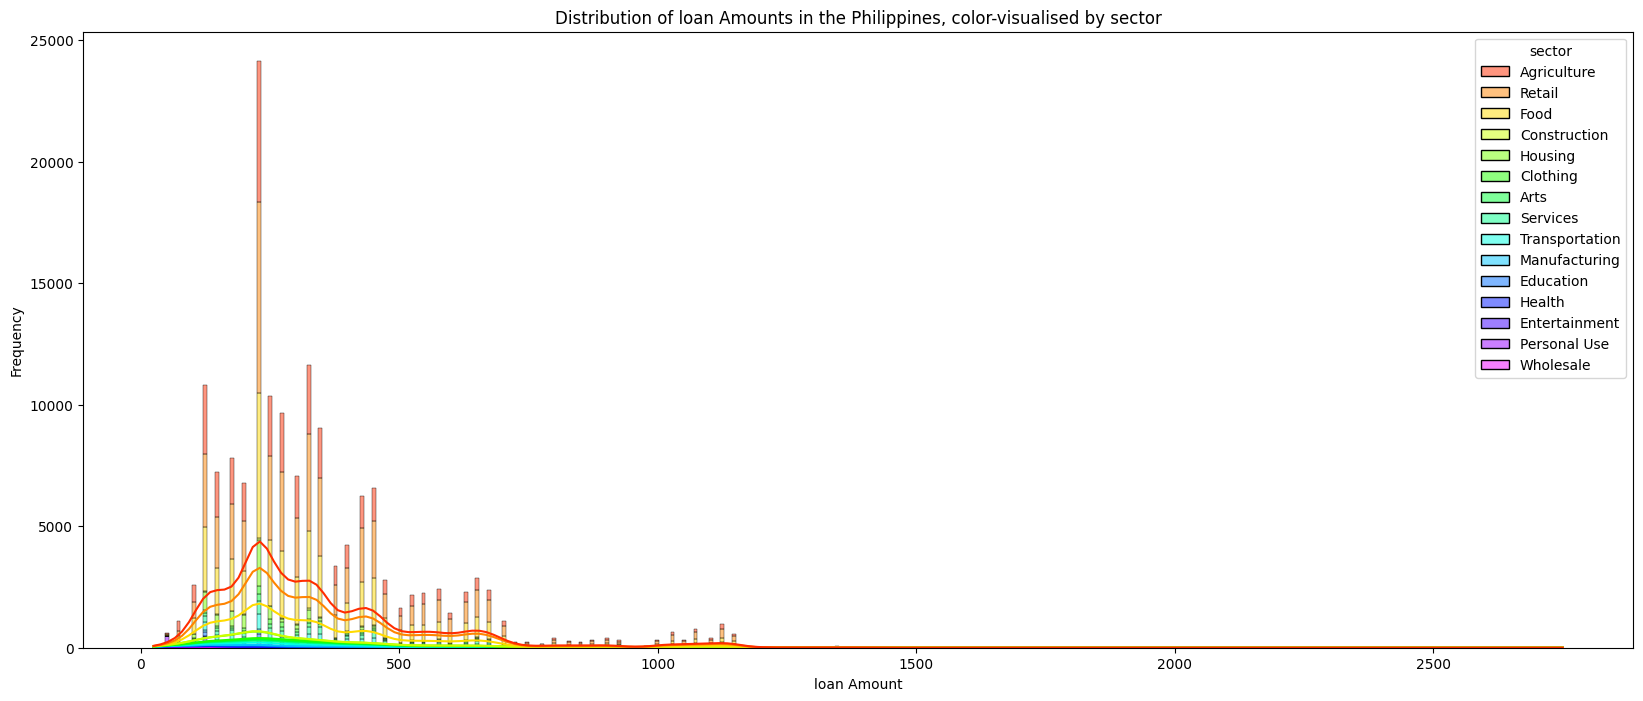

In [185]:
# Philippines filter
philippines_data = data_top_10[data_top_10['country'] == 'Philippines']

# Plot
plt.figure(figsize=(20, 8))
sns.histplot(philippines_data, x='loan_amount', hue='sector', multiple='stack', kde=True, palette='gist_rainbow')
plt.title('Distribution of loan Amounts in the Philippines, color-visualised by sector')
plt.xlabel('loan Amount')
plt.ylabel('Frequency')
plt.show()

In [186]:
philippines_sector_stats = philippines_data.groupby('sector')['loan_amount'].describe().T

print("Philipinnes only:")
print(philippines_sector_stats)

Philipinnes only:
sector   Agriculture         Arts     Clothing  Construction    Education  \
count   36425.000000  1990.000000  2701.000000    788.000000  1717.000000   
mean      320.310913   292.537688   385.986672    413.134518   307.979033   
std       192.436417   143.236901   236.644831    248.720507   208.246281   
min        25.000000    75.000000    50.000000     75.000000    50.000000   
25%       200.000000   200.000000   225.000000    225.000000   175.000000   
50%       275.000000   275.000000   325.000000    325.000000   250.000000   
75%       375.000000   350.000000   450.000000    525.000000   400.000000   
max      2425.000000  1375.000000  2750.000000   1500.000000  2275.000000   

sector  Entertainment          Food       Health      Housing  Manufacturing  \
count      139.000000  42001.000000   625.000000  6579.000000    1439.000000   
mean       448.021583    341.407943   455.880000   263.220094     367.373176   
std        234.251521    197.425165   281.131431

<ipython-input-187-793a07399aaf>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_loans_by_country.index, y=average_loans_by_country.values, palette='viridis')


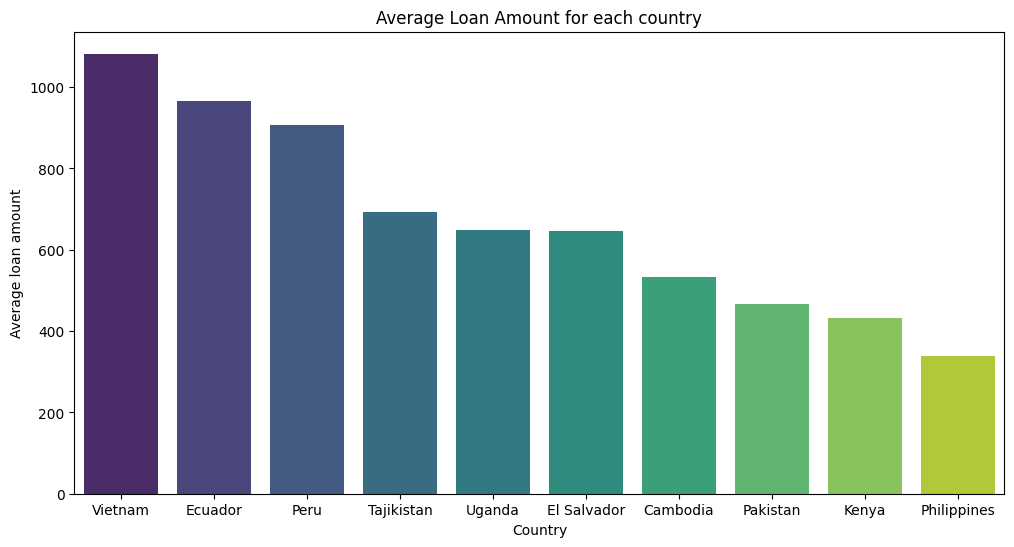

In [187]:
# Average loan amount for each top 10 country
average_loans_by_country = data_top_10.groupby('country')['loan_amount'].mean()

# Sort the countries (high to low)
average_loans_by_country = average_loans_by_country.sort_values(ascending=False)

# Lav et barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_loans_by_country.index, y=average_loans_by_country.values, palette='viridis')
plt.title('Average Loan Amount for each country')
plt.xlabel('Country')
plt.ylabel('Average loan amount')
plt.show()

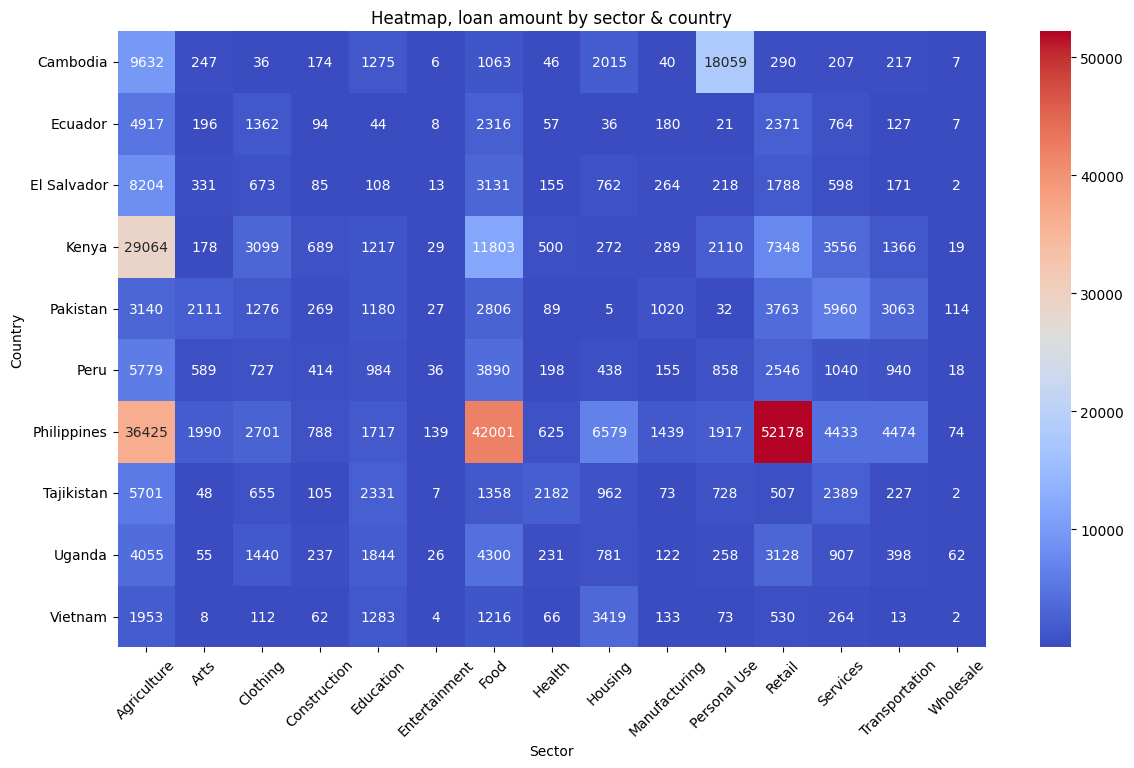

In [188]:
# Create a pivot table for the heatmap
outcome_heatmap_data = data_top_10.pivot_table(index='country', columns='sector', values='loan_amount', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(outcome_heatmap_data, annot=True, fmt="d", cmap="coolwarm")

# Set titles and labels
plt.title('Heatmap, loan amount by sector & country')
plt.xlabel('Sector')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

<ipython-input-189-14d6faf06e2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_10['funded_time'] = pd.to_datetime(data_top_10['funded_time'])


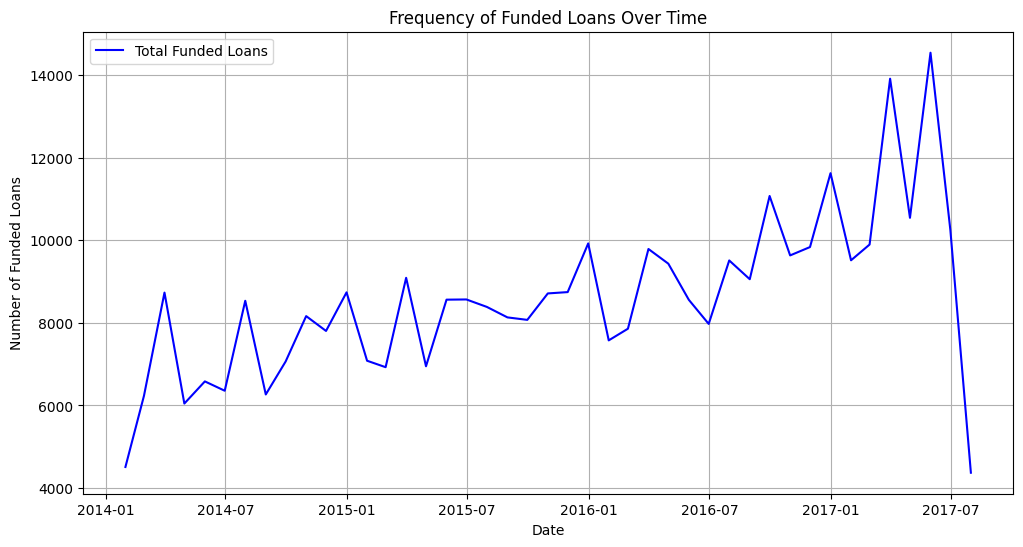

In [189]:
#use pandas to ensure that 'funded_time' is in a datetime format
data_top_10['funded_time'] = pd.to_datetime(data_top_10['funded_time'])

#set the date column as the index
data_top_10.set_index('funded_time', inplace=True)

#resample the data to a monthly frequency (can also be yearly, daily, etc.)
funded_trend = data_top_10.resample('M').size()

#plot the frequency of searches over time
plt.figure(figsize=(12, 6))
plt.plot(funded_trend, label='Total Funded Loans', color='blue')

#reset index to ensure "funded_time" returns back as a column in the dataframe
data_top_10.reset_index(inplace=True)

#add labels and title
plt.title('Frequency of Funded Loans Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Funded Loans')
plt.legend()
plt.grid(True)
plt.show()